## Layering plot

In [2]:
## Pre-processing data first

In [3]:
# Import modules
%matplotlib inline
%run /g/data/w40/pn3424/2025/Time-series-plot/code/Functions.ipynb
import matplotlib as mpl
import fnmatch
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import cartopy as cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [4]:
# Define region of interest The mainland: 5=25, 90-110
lat_slice = slice(-50,50)
lon_slice = slice(-180,180)
time_slice = slice("1960-01-01", "2014-12-30")

# Define temporal scale for SPI variable (1 for 3-months, 2 for 6-months, 3 for 12-months); use "None" if not using the SPI variable
iscale = None

# Define season as a list of month numbers. If not wanting a seasonal breakdown, use None.
# Suggestions: Wet 6-month: [10,11,12,1,2,3]; Dry 6-month: [4,5,6,7,8,9]; Wet 3-month: [12,1,2]; Dry 3-month: [6,7,8]
season =  None
season_name ='Annual' #'3-Month Wet: DJF' #'3-Month Dry: JJA' 

# Paths to mask datasets

mask_ds = xr.open_dataset('/g/data/w40/pn3424/2025/Lisa/landmask_regen.nc')

# Extract masks over SEA
mask = mask_ds.land.sel(lat=lat_slice, lon=lon_slice).isel(time=0)
mask


<xarray.DataArray 'land' (lat: 100, lon: 360)>
[36000 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 1983-07-02
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -49.5 -48.5 -47.5 -46.5 -45.5 ... 46.5 47.5 48.5 49.5
Attributes:
    long_name:     Daily PR intensity
    units:         mm/day
    cell_methods:  time: mean
    comment:       This daily precipitation is calculated from the daily sour...
    definition:    Annual total precipitation divided by the number of wet da...
    expert_team:   ETCCDI

In [5]:
# Define keywords to be used with f-strings to build the path to datasets
model_type = 'gcm'
grid_type = '1degree'
time_period = 'historical'
variable = 'sdii'
temporal_resolution = 'MON'
obs_temporal_resolution = 'MON'

# Define paths to data
cmip6_data_path = '/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/'

In [6]:
data_paths = get_model_files(cmip6_data_path)
pd.set_option('display.max_colwidth', None)
data_paths

,driving_gcm,dataset_path
0,HadGEM3-GC31-LL,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_HadGEM3-GC31-LL_historical_1950-2014_1deg.nc
1,CNRM-CM6-1,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_CNRM-CM6-1_historical_1950-2014_1deg.nc
2,NESM3,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_NESM3_historical_1950-2014_1deg.nc
3,INM-CM4-8,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_INM-CM4-8_historical_1950-2014_1deg.nc
4,ACCESS-CM2,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_ACCESS-CM2_historical_1950-2014_1deg.nc
5,KACE-1-0-G,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_KACE-1-0-G_historical_1950-2014_1deg.nc
6,CNRM-ESM2-1,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_CNRM-ESM2-1_historical_1950-2014_1deg.nc
7,MPI-ESM1-2-HR,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_MPI-ESM1-2-HR_historical_1950-2014_1deg.nc
8,NorESM2-MM,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_NorESM2-MM_historical_1950-2014_1deg.nc
9,GFDL-CM4,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_GFDL-CM4_historical_1950-2014_1deg.nc


In [7]:
subset=['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'EC-Earth3-Veg', 
            'FGOALS-g3', 'GFDL-CM4', 'GFDL-ESM4', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0', 'KACE-1-0-G',
    'KIOST-ESM', 'MIROC-ES2L', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL', 'CanESM5', 'CanESM5', 'MPI-ESM1-2-LR']

In [8]:
model_paths = get_model_files_subset(data_paths, subset)
model_paths

,model_name,dataset_path
0,HadGEM3-GC31-LL,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_HadGEM3-GC31-LL_historical_1950-2014_1deg.nc
1,CNRM-CM6-1,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_CNRM-CM6-1_historical_1950-2014_1deg.nc
2,NESM3,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_NESM3_historical_1950-2014_1deg.nc
3,INM-CM4-8,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_INM-CM4-8_historical_1950-2014_1deg.nc
4,ACCESS-CM2,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_ACCESS-CM2_historical_1950-2014_1deg.nc
5,KACE-1-0-G,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_KACE-1-0-G_historical_1950-2014_1deg.nc
6,CNRM-ESM2-1,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_CNRM-ESM2-1_historical_1950-2014_1deg.nc
7,MPI-ESM1-2-HR,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_MPI-ESM1-2-HR_historical_1950-2014_1deg.nc
8,NorESM2-MM,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_NorESM2-MM_historical_1950-2014_1deg.nc
9,GFDL-CM4,/g/data/w40/pn3424/2025/Lisa/Data/CMIP6/sdii_GFDL-CM4_historical_1950-2014_1deg.nc


## Calculating time series of regional-weighted average over land

In [9]:
# Initialize an empty dictionary to store model time series as DataArrays
ts_model_dict = {}

# Loop through RCM simulations and calculate the model bias; store in a dictionary
for i, row in model_paths.iterrows():
    ts_xr=get_weighted_ts(row[1], variable, time_slice, lat_slice, lon_slice, season, iscale, mask)
    ts_model_dict[f'{row[0]}'] = ts_xr
print(ts_model_dict.keys())

dict_keys(['HadGEM3-GC31-LL', 'CNRM-CM6-1', 'NESM3', 'INM-CM4-8', 'ACCESS-CM2', 'KACE-1-0-G', 'CNRM-ESM2-1', 'MPI-ESM1-2-HR', 'NorESM2-MM', 'GFDL-CM4', 'HadGEM3-GC31-MM', 'BCC-CSM2-MR', 'INM-CM5-0', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'ACCESS-ESM1-5', 'FGOALS-g3', 'GFDL-ESM4', 'MPI-ESM1-2-LR', 'KIOST-ESM', 'UKESM1-0-LL', 'EC-Earth3-Veg', 'NorESM2-LM', 'MIROC-ES2L', 'CanESM5'])


In [10]:
##align time cor for all models 

In [11]:
import xarray as xr
import numpy as np
import pandas as pd

# Define the target time coordinate
target_time = pd.date_range(start='1960-01-01', periods=55, freq='YS')  # Annual, starting 1 July

# Harmonize each model
harmonized = {}
for model, da in ts_model_dict.items():
    # Create a new DataArray with the harmonized time
    new_da = da.copy()
    new_da['time'] = target_time
    harmonized[model] = new_da


In [12]:
import matplotlib.pyplot as plt
import xarray as xr

# ts_model_dict = {'model1': ts1, 'model2': ts2, ...}

# Step 1: Combine model time series into a single DataArray
harmonized_all = xr.concat(list(harmonized.values()), dim='model', coords='minimal')
harmonized_all['model'] = list(harmonized.keys())  # label models if desired

# Step 2: Calculate statistics across models
mean_harmonized = harmonized_all.mean(dim='model')
min_harmonized = harmonized_all.min(dim='model')
max_harmonized = harmonized_all.max(dim='model')


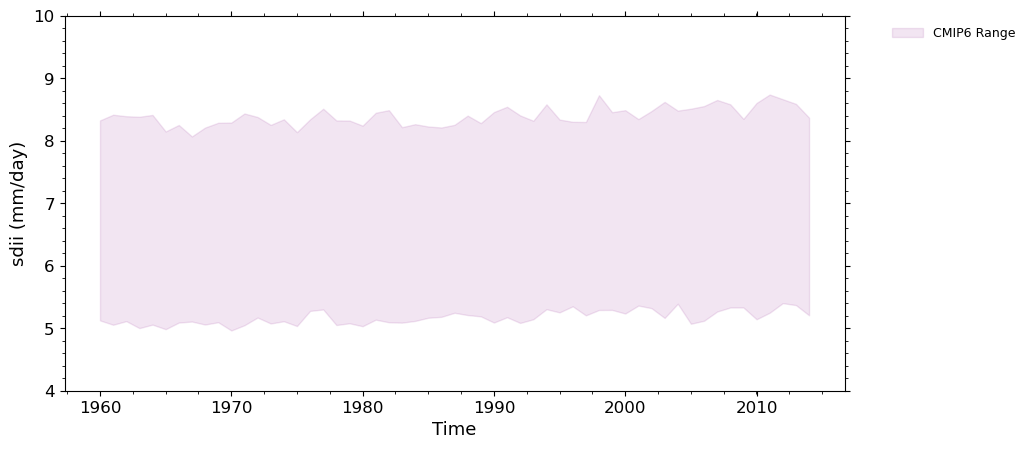

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))  # Total figure size in inches
ax = fig.add_axes([0.1, 0.15, 0.65, 0.75])

color_map = {
    'CPC_v1.0': 'orange',
    'GPCC_FDD_v2022': 'green',
    'REGEN_ALL_2019': 'red',
    '3B42_v7.0':'blue',
    'GIRAFE':'cyan', 
    'GSMAP-NRT-gauges-v8.0':'darkgreen', 
    'IMERG-v07B-FC':'maroon', 
    'PERSIANN_v1_r1':'yellow', 
    'CHIRPS_v2.0':'navy',
    'GPCP_V3.2':'teal', 
    'CMORPH_v1.0_CRT':'hotpink', 
    'MERRA2': 'light coral', 
    'JRA-55':'peru', 
    'ERA5': 'deepbluesky', 
    'CFSR':'orchid'
    # Add more mappings if you have more datasets
}

# Plot CMIP6 model range
ax.fill_between(mean_harmonized['time'], min_harmonized, max_harmonized, 
                color='purple', alpha=0.1, label='CMIP6 Range')

# Axis settings
ax.set_xlabel("Time", fontsize=13)
ax.set_ylabel("sdii (mm/day)", fontsize=13)
ax.set_ylim(4, 10)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Legend: outside and fixed
legend = fig.legend(
    loc='upper left',
    bbox_to_anchor=(0.78, 0.9),
    frameon=False,
    fontsize=9,
    markerscale=1.5,
    labelspacing=0.4,
    handlelength=2.5,
    borderaxespad=0.5
)

plt.savefig("/g/data/w40/pn3424/2025/Lisa/CMIP6_50N.png", dpi=300, bbox_inches='tight')
plt.show()



## for OBS data

In [14]:
obs_path="/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/"

obs_paths = get_model_files(obs_path)
pd.set_option('display.max_colwidth', None)
obs_paths

insitu=['CPC_v1.0', 'GPCC_FDD_v2022', 'REGEN_ALL_2019']

In [15]:
insitu_paths = get_model_files_subset(obs_paths, insitu)
insitu_paths

,model_name,dataset_path
0,CPC_v1.0,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_CPC_v1.0_1979-2022.nc
1,GPCC_FDD_v2022,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_GPCC_FDD_v2022_1982-2020.nc
2,REGEN_ALL_2019,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_REGEN_ALL_2019_1950-2016.nc


In [16]:
# Initialize an empty dictionary to store model time series as DataArrays
ts_insitu_dict = {}

# Loop through RCM simulations and calculate the model bias; store in a dictionary
for i, row in insitu_paths.iterrows():
    ts_xr=get_weighted_ts(row[1], variable, time_slice, lat_slice, lon_slice, season, iscale, mask)
    ts_insitu_dict[f'{row[0]}'] = ts_xr
print(ts_insitu_dict.keys())

dict_keys(['CPC_v1.0', 'GPCC_FDD_v2022', 'REGEN_ALL_2019'])


In [17]:
import pandas as pd

# Harmonize the time axis in each DataArray
for key in ts_insitu_dict:
    da = ts_insitu_dict[key]
    # Replace time with a new datetime index: January 1st of each year
    years = da['time'].dt.year
    new_time = xr.DataArray(
        pd.to_datetime([f"{y}-01-01" for y in years.values]),
        dims='time'
    )
    ts_insitu_dict[key] = da.assign_coords(time=new_time)


In [18]:
ts_insitu_dict

{'CPC_v1.0': <xarray.DataArray 'sdii' (time: 36)>
 array([7.42052743, 7.49855022, 7.61245131, 7.78659576, 8.02244916,
        7.46160334, 7.68741608, 7.53632381, 7.220245  , 7.50340033,
        7.27761293, 7.14296348, 7.42763266, 7.22884076, 7.38610953,
        7.33569312, 7.52699647, 7.38341299, 7.4743088 , 7.67574498,
        7.5501029 , 7.61808364, 7.38136034, 7.47304444, 7.65685707,
        7.71368355, 7.76524907, 7.72799111, 7.880825  , 7.74507182,
        7.79619386, 8.07416031, 7.92754568, 7.81869785, 7.72150278,
        7.65025419])
 Coordinates:
   * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2014-01-01,
 'GPCC_FDD_v2022': <xarray.DataArray 'sdii' (time: 33)>
 array([9.47520193, 9.45538252, 9.40734933, 9.3344526 , 9.00427196,
        9.06409405, 9.21858447, 9.04482574, 8.8610078 , 9.16931228,
        8.87879326, 8.91407134, 9.06706996, 9.12867667, 8.93801139,
        8.96695701, 9.25994759, 9.25414442, 9.28036908, 8.93328382,
        9.18955055, 9.21503941, 9.191

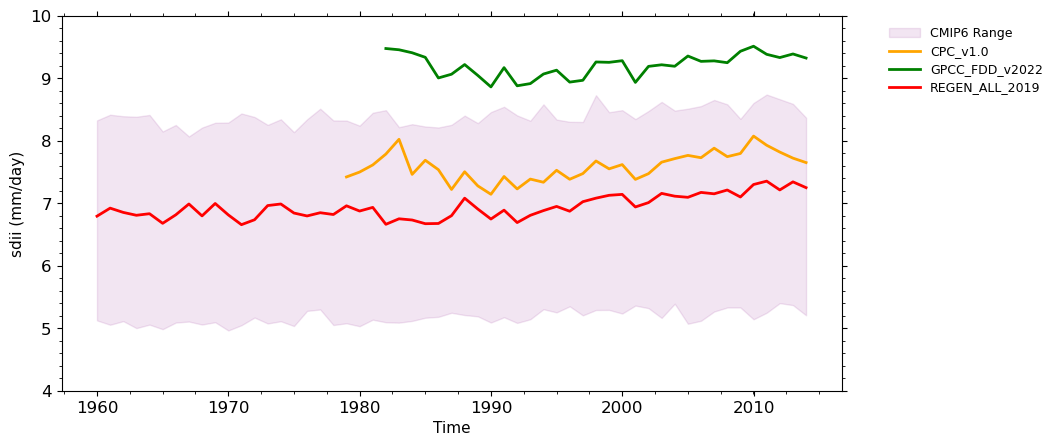

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))  # Total figure size in inches
ax = fig.add_axes([0.1, 0.15, 0.65, 0.75]) 
# [left, bottom, width, height] in relative coords (0-1)

color_map = {
    'CPC_v1.0': 'orange',
    'GPCC_FDD_v2022': 'green',
    'REGEN_ALL_2019': 'red',
    '3B42_v7.0':'blue',
    'GIRAFE':'cyan', 
    'GSMAP-NRT-gauges-v8.0':'darkgreen', 
    'IMERG-v07B-FC':'maroon', 
    'PERSIANN_v1_r1':'yellow', 
    'CHIRPS_v2.0':'navy',
    'GPCP_V3.2':'teal', 
    'CMORPH_v1.0_CRT':'hotpink', 
    'MERRA2': 'light coral', 
    'JRA-55':'peru', 
    'ERA5': 'deepbluesky', 
    'CFSR':'orchid'
    # Add more mappings if you have more datasets
}


# Plot CMIP6 model range
ax.fill_between(mean_harmonized['time'], min_harmonized, max_harmonized, 
                color='purple', alpha=0.1, label='CMIP6 Range')

# Plot in-situ and satellite datasets
for name, da in ts_insitu_dict.items():
    color = color_map.get(name, 'black')
    ax.plot(da['time'], da, label=name, linewidth=2, color=color)

# Axis settings
ax.set_xlabel("Time", fontsize=11)
ax.set_ylabel("sdii (mm/day)", fontsize=11)
ax.set_ylim(4, 10)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.minorticks_on()

# Legend: outside and fixed
legend = fig.legend(
    loc='upper left',
    bbox_to_anchor=(0.78, 0.9),
    frameon=False,
    fontsize=9,
    markerscale=1.5,
    labelspacing=0.4,
    handlelength=2.5,
    borderaxespad=0.5
)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.savefig("/g/data/w40/pn3424/2025/Lisa/CMIP6_insitu_50N.png", dpi=300, bbox_inches='tight')
plt.show()



## Satelite with correction to rain gauge

In [20]:
sate=['3B42_v7.0','GIRAFE', 'GSMAP-NRT-gauges-v8.0', 'IMERG-v07B-FC', 'PERSIANN_v1_r1', 
             'CHIRPS_v2.0','GPCP_V3.2', 'CMORPH_v1.0_CRT']

In [21]:
sate_paths = get_model_files_subset(obs_paths, sate)
sate_paths

,model_name,dataset_path
0,3B42_v7.0,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_3B42_v7.0_1998-2019.nc
1,GSMAP-NRT-gauges-v8.0,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_ANN_GSMAP-NRT-gauges-v8.0_his_1deg_2001-2023.nc
2,CMORPH_v1.0_CRT,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_CMORPH_v1.0_CRT_1998-2021.nc
3,CHIRPS_v2.0,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_CHIRPS_v2.0_1981-2022.nc
4,IMERG-v07B-FC,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_ANN_IMERG-v07B-FC_his_1deg_2001-2023.nc
5,GIRAFE,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_ANN_GIRAFE_1deg_historical_2002-2022.nc
6,GPCP_V3.2,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_GPCP_V3.2_2000-2020.nc
7,PERSIANN_v1_r1,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_PERSIANN_v1_r1_1983-2021.nc


In [22]:
# Initialize an empty dictionary to store model time series as DataArrays
ts_sate_dict = {}

# Loop through RCM simulations and calculate the model bias; store in a dictionary
for i, row in sate_paths.iterrows():
    ts_xr=get_weighted_ts(row[1], variable, time_slice, lat_slice, lon_slice, season, iscale, mask)
    ts_sate_dict[f'{row[0]}'] = ts_xr
print(ts_sate_dict.keys())

dict_keys(['3B42_v7.0', 'GSMAP-NRT-gauges-v8.0', 'CMORPH_v1.0_CRT', 'CHIRPS_v2.0', 'IMERG-v07B-FC', 'GIRAFE', 'GPCP_V3.2', 'PERSIANN_v1_r1'])


In [23]:
import pandas as pd

# Harmonize the time axis in each DataArray
for key in ts_sate_dict:
    da = ts_sate_dict[key]
    # Replace time with a new datetime index: January 1st of each year
    years = da['time'].dt.year
    new_time = xr.DataArray(
        pd.to_datetime([f"{y}-01-01" for y in years.values]),
        dims='time'
    )
    ts_sate_dict[key] = da.assign_coords(time=new_time)

In [24]:
ts_sate_dict

{'3B42_v7.0': <xarray.DataArray 'sdii' (time: 17)>
 array([8.93694382, 8.68269888, 8.53500716, 8.16133204, 8.09002967,
        8.30694506, 8.27260545, 8.24503486, 8.29373165, 8.27707367,
        8.19896493, 8.13317894, 8.28171484, 8.25736758, 8.16067433,
        8.23772406, 8.18332815])
 Coordinates:
   * time     (time) datetime64[ns] 1998-01-01 1999-01-01 ... 2014-01-01,
 'GSMAP-NRT-gauges-v8.0': <xarray.DataArray 'sdii' (time: 15)>
 array([8.57263959, 8.3206008 , 8.08208077, 7.99032863, 8.0853376 ,
        7.78734266, 7.73656214, 7.64284792, 7.6373196 , 7.48777475,
        7.86420437, 7.61997553, 7.4895215 , 7.30145812, 7.20892812])
 Coordinates:
   * time     (time) datetime64[ns] 2000-01-01 2001-01-01 ... 2014-01-01,
 'CMORPH_v1.0_CRT': <xarray.DataArray 'sdii' (time: 17)>
 array([7.50830266, 7.40050401, 7.63309791, 7.58969139, 7.59337066,
        7.78706189, 7.88825183, 7.67791736, 7.64550106, 7.82755548,
        7.73557157, 7.79399139, 8.01187986, 7.85552648, 7.76258981,
       

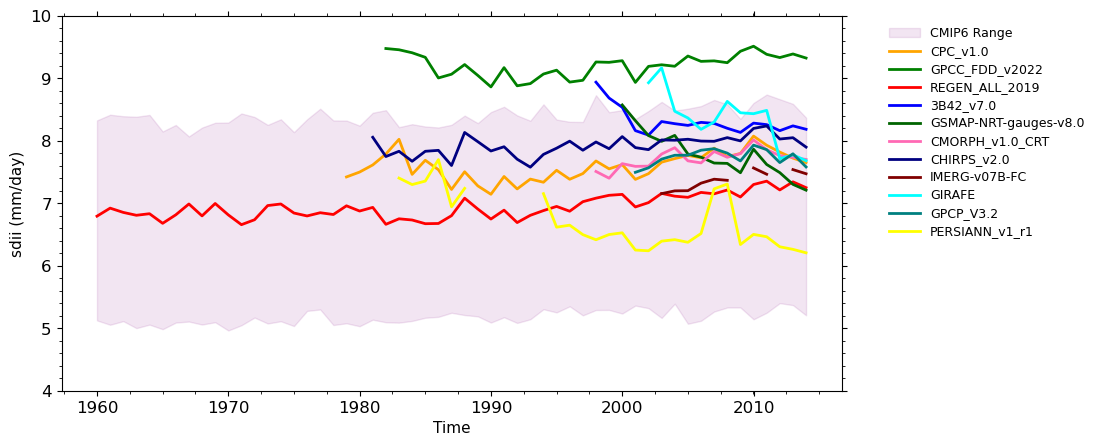

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))  # Total figure size in inches
ax = fig.add_axes([0.1, 0.15, 0.65, 0.75])  # [left, bottom, width, height] in relative coords (0-1)
color_map = {
    'CPC_v1.0': 'orange',
    'GPCC_FDD_v2022': 'green',
    'REGEN_ALL_2019': 'red',
    '3B42_v7.0':'blue',
    'GIRAFE':'cyan', 
    'GSMAP-NRT-gauges-v8.0':'darkgreen', 
    'IMERG-v07B-FC':'maroon', 
    'PERSIANN_v1_r1':'yellow', 
    'CHIRPS_v2.0':'navy',
    'GPCP_V3.2':'teal', 
    'CMORPH_v1.0_CRT':'hotpink', 
    'MERRA2': 'lightcoral', 
    'JRA-55':'peru', 
    'ERA5': 'deepbluesky', 
    'CFSR':'orchid'
    # Add more mappings if you have more datasets
}

# Plot CMIP6 model range
ax.fill_between(mean_harmonized['time'], min_harmonized, max_harmonized, 
                color='purple', alpha=0.1, label='CMIP6 Range')

# Plot in-situ and satellite datasets
for name, da in ts_insitu_dict.items():
    color = color_map.get(name, 'black')
    ax.plot(da['time'], da, label=name, linewidth=2, color=color)

for name, da in ts_sate_dict.items():
    color = color_map.get(name, 'black')
    ax.plot(da['time'], da, label=name, linewidth=2, color=color)

# Axis settings
ax.set_xlabel("Time", fontsize=11)
ax.set_ylabel("sdii (mm/day)", fontsize=11)
ax.set_ylim(4, 10)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.minorticks_on()

# Legend: outside and fixed
legend = fig.legend(
    loc='upper left',
    bbox_to_anchor=(0.78, 0.9),
    frameon=False,
    fontsize=9,
    markerscale=1.5,
    labelspacing=0.4,
    handlelength=2.5,
    borderaxespad=0.5
)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.savefig("/g/data/w40/pn3424/2025/Lisa/CMIP6_fixed_plot_area_50N.png", dpi=300, bbox_inches='tight')
plt.show()


## with reanalysese

In [26]:
rea=['MERRA2','JRA-55', 'ERA5', 'CFSR']
rea_paths = get_model_files_subset(obs_paths, rea)
rea_paths

,model_name,dataset_path
0,CFSR,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_CFSR_1979-2019.nc
1,MERRA2,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_MERRA2_1980-2019.nc
2,ERA5,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_ERA5_1979-2022.nc
3,JRA-55,/g/data/w40/pn3424/2024/Lisa/data/sdii/yr/sdii_yr_JRA-55_1958-2019.nc


In [27]:
# Initialize an empty dictionary to store model time series as DataArrays
ts_rea_dict = {}

# Loop through RCM simulations and calculate the model bias; store in a dictionary
for i, row in rea_paths.iterrows():
    ts_xr=get_weighted_ts(row[1], variable, time_slice, lat_slice, lon_slice, season, iscale, mask)
    ts_rea_dict[f'{row[0]}'] = ts_xr
print(ts_rea_dict.keys())

dict_keys(['CFSR', 'MERRA2', 'ERA5', 'JRA-55'])


In [28]:
import pandas as pd

# Harmonize the time axis in each DataArray
for key in ts_rea_dict:
    da = ts_rea_dict[key]
    # Replace time with a new datetime index: January 1st of each year
    years = da['time'].dt.year
    new_time = xr.DataArray(
        pd.to_datetime([f"{y}-01-01" for y in years.values]),
        dims='time'
    )
    ts_rea_dict[key] = da.assign_coords(time=new_time)

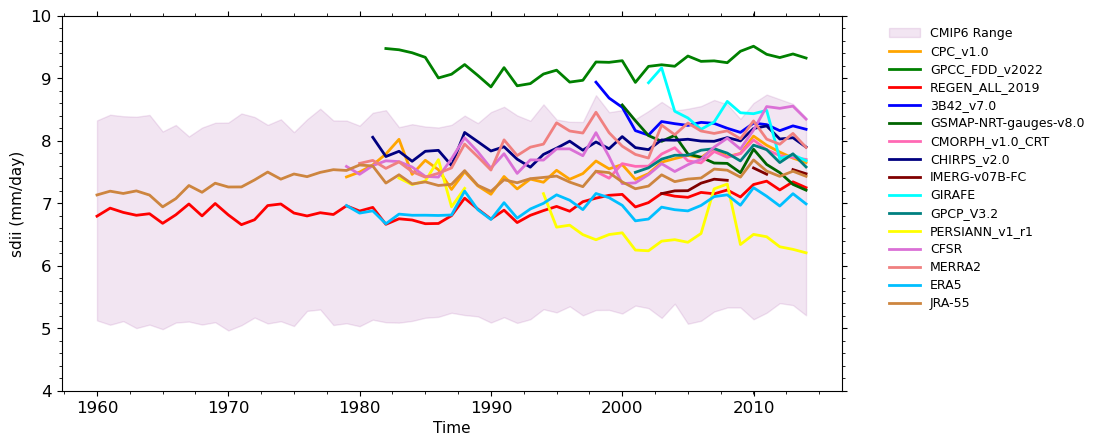

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))  # Total figure size in inches
ax = fig.add_axes([0.1, 0.15, 0.65, 0.75])  # [left, bottom, width, height] in relative coords (0-1)
color_map = {
    'CPC_v1.0': 'orange',
    'GPCC_FDD_v2022': 'green',
    'REGEN_ALL_2019': 'red',
    '3B42_v7.0':'blue',
    'GIRAFE':'cyan', 
    'GSMAP-NRT-gauges-v8.0':'darkgreen', 
    'IMERG-v07B-FC':'maroon', 
    'PERSIANN_v1_r1':'yellow', 
    'CHIRPS_v2.0':'navy',
    'GPCP_V3.2':'teal', 
    'CMORPH_v1.0_CRT':'hotpink', 
    'MERRA2': 'lightcoral', 
    'JRA-55':'peru', 
    'ERA5': 'deepskyblue', 
    'CFSR':'orchid'
    # Add more mappings if you have more datasets
}

# Plot CMIP6 model range
ax.fill_between(mean_harmonized['time'], min_harmonized, max_harmonized, 
                color='purple', alpha=0.1, label='CMIP6 Range')

# Plot in-situ and satellite datasets
for name, da in ts_insitu_dict.items():
    color = color_map.get(name, 'black')
    ax.plot(da['time'], da, label=name, linewidth=2, color=color)

for name, da in ts_sate_dict.items():
    color = color_map.get(name, 'black')
    ax.plot(da['time'], da, label=name, linewidth=2, color=color)

for name, da in ts_rea_dict.items():
    color = color_map.get(name, 'black')
    ax.plot(da['time'], da, label=name, linewidth=2, color=color)

# Axis settings
ax.set_xlabel("Time", fontsize=11)
ax.set_ylabel("sdii (mm/day)", fontsize=11)
ax.set_ylim(4, 10)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.minorticks_on()

# Legend: outside and fixed
legend = fig.legend(
    loc='upper left',
    bbox_to_anchor=(0.78, 0.9),
    frameon=False,
    fontsize=9,
    markerscale=1.5,
    labelspacing=0.4,
    handlelength=2.5,
    borderaxespad=0.5
)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.savefig("/g/data/w40/pn3424/2025/Lisa/CMIP6_insitu_sate_rea_50N.png", dpi=300, bbox_inches='tight')
plt.show()
